# Importing the Basic Libraries

In [1]:
import pandas as pd #For reading the dataset
import numpy as np #For array manipulation
import matplotlib.pyplot as plt #For plotting graphs
import warnings
warnings.filterwarnings("ignore")  #This is done to ignore the warnings
import seaborn as sns #Visualization
from collections import Counter #For balancing the dataset
from sklearn.feature_selection import chi2 #For feature selection based on chi^2 test
from sklearn.linear_model import LogisticRegression # For training on different models
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #For evaluation metrics
from sklearn.model_selection import train_test_split, GridSearchCV #For hyperparameter tuning

# Read the Datasets

In [2]:
train=pd.read_csv('panic_disorder_dataset_training.csv')
train.head() #print the first 5 rows of the training dataset

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,1,38,Male,No,Yes,Moderate,Shortness of breath,Mild,Mild,Rural,Diabetes,Bipolar disorder,None,Socializing,High,Sleep quality,0
1,2,51,Male,No,No,High,Panic attacks,Mild,Mild,Urban,Asthma,Anxiety disorder,Drugs,Exercise,High,Sleep quality,0
2,3,32,Female,Yes,No,High,Panic attacks,Mild,Significant,Urban,Diabetes,Depressive disorder,None,Seeking therapy,Moderate,Exercise,0
3,4,64,Female,No,No,Moderate,Chest pain,Moderate,Moderate,Rural,Diabetes,None,None,Meditation,High,Exercise,0
4,5,31,Male,Yes,No,Moderate,Panic attacks,Mild,Moderate,Rural,Asthma,None,Drugs,Seeking therapy,Low,Sleep quality,0


In [3]:
test=pd.read_csv('panic_disorder_dataset_testing.csv')
test.head() #print the first 5 rows of the training dataset

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,1,41,Male,Yes,No,High,Shortness of breath,Mild,Mild,Urban,Diabetes,Bipolar disorder,Alcohol,Seeking therapy,Low,Exercise,0
1,2,20,Female,Yes,No,Low,Shortness of breath,Mild,Significant,Urban,Asthma,Anxiety disorder,Drugs,Exercise,High,Diet,0
2,3,32,Male,Yes,Yes,High,Panic attacks,Severe,Mild,Rural,Heart disease,Bipolar disorder,Drugs,Meditation,Moderate,Exercise,0
3,4,41,Female,Yes,Yes,Moderate,Shortness of breath,Moderate,Significant,Urban,Heart disease,Anxiety disorder,None,Exercise,High,Sleep quality,0
4,5,36,Female,Yes,No,High,Chest pain,Severe,Significant,Rural,Asthma,Depressive disorder,None,Seeking therapy,Low,Exercise,0


# Handling missing values

In [4]:
print('Train data shape:',train.shape) #1 lakh rows and 17 columns in the training dataset

Train data shape: (100000, 17)


In [5]:
print('Train data shape:',train.shape) #1 lakh rows and 17 columns in the training dataset

Train data shape: (100000, 17)


In [6]:
train.info() #Medical History, Psychiatric History, Substance Use contains null values training dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Participant ID            100000 non-null  int64 
 1   Age                       100000 non-null  int64 
 2   Gender                    100000 non-null  object
 3   Family History            100000 non-null  object
 4   Personal History          100000 non-null  object
 5   Current Stressors         100000 non-null  object
 6   Symptoms                  100000 non-null  object
 7   Severity                  100000 non-null  object
 8   Impact on Life            100000 non-null  object
 9   Demographics              100000 non-null  object
 10  Medical History           100000 non-null  object
 11  Psychiatric History       100000 non-null  object
 12  Substance Use             100000 non-null  object
 13  Coping Mechanisms         100000 non-null  object
 14  Socia

In [7]:
test.info() #Medical History, Psychiatric History, Substance Use contains null values in test dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Participant ID            20000 non-null  int64 
 1   Age                       20000 non-null  int64 
 2   Gender                    20000 non-null  object
 3   Family History            20000 non-null  object
 4   Personal History          20000 non-null  object
 5   Current Stressors         20000 non-null  object
 6   Symptoms                  20000 non-null  object
 7   Severity                  20000 non-null  object
 8   Impact on Life            20000 non-null  object
 9   Demographics              20000 non-null  object
 10  Medical History           20000 non-null  object
 11  Psychiatric History       20000 non-null  object
 12  Substance Use             20000 non-null  object
 13  Coping Mechanisms         20000 non-null  object
 14  Social Support        

In [8]:
train.isnull().sum() #Determining the number of null values in each of {Medical History, Psychiatric History, Substance} in training dataset

Participant ID              0
Age                         0
Gender                      0
Family History              0
Personal History            0
Current Stressors           0
Symptoms                    0
Severity                    0
Impact on Life              0
Demographics                0
Medical History             0
Psychiatric History         0
Substance Use               0
Coping Mechanisms           0
Social Support              0
Lifestyle Factors           0
Panic Disorder Diagnosis    0
dtype: int64

In [9]:
test.isnull().sum() #Determining the number of null values in each of {Medical History, Psychiatric History, Substance} in testing dataset

Participant ID              0
Age                         0
Gender                      0
Family History              0
Personal History            0
Current Stressors           0
Symptoms                    0
Severity                    0
Impact on Life              0
Demographics                0
Medical History             0
Psychiatric History         0
Substance Use               0
Coping Mechanisms           0
Social Support              0
Lifestyle Factors           0
Panic Disorder Diagnosis    0
dtype: int64

In [10]:
train.replace('None', pd.NA, inplace=True)
train['Medical History'].fillna('No Medical History', inplace=True)
train['Psychiatric History'].fillna('No Psychiatric History', inplace=True)
train['Substance Use'].fillna('No Substance Use', inplace=True)

In [11]:
train.isnull().sum()

Participant ID              0
Age                         0
Gender                      0
Family History              0
Personal History            0
Current Stressors           0
Symptoms                    0
Severity                    0
Impact on Life              0
Demographics                0
Medical History             0
Psychiatric History         0
Substance Use               0
Coping Mechanisms           0
Social Support              0
Lifestyle Factors           0
Panic Disorder Diagnosis    0
dtype: int64

In [12]:
test.replace('None', pd.NA, inplace=True)
test['Medical History'].fillna('No Medical History', inplace=True)
test['Psychiatric History'].fillna('No Psychiatric History', inplace=True)
test['Substance Use'].fillna('No Substance Use', inplace=True)

In [13]:
test.isnull().sum()

Participant ID              0
Age                         0
Gender                      0
Family History              0
Personal History            0
Current Stressors           0
Symptoms                    0
Severity                    0
Impact on Life              0
Demographics                0
Medical History             0
Psychiatric History         0
Substance Use               0
Coping Mechanisms           0
Social Support              0
Lifestyle Factors           0
Panic Disorder Diagnosis    0
dtype: int64

# Exploratory Analysis

### Visual Analysis

In [ ]:
train.describe(include='all')

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
count,100000.000000,100000.000000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000.00000
unique,NaN,NaN,2,2,2,3,5,3,3,2,4,4,3,4,3,3,NaN
top,NaN,NaN,Male,Yes,No,Low,Fear of losing control,Severe,Mild,Rural,No Medical History,Bipolar disorder,Alcohol,Socializing,High,Exercise,NaN
freq,NaN,NaN,50052,50042,50210,33409,20236,33510,33452,50087,25173,25058,33445,25197,33453,33597,NaN
mean,50000.500000,41.454300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04285
std,28867.657797,13.839204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.20252
min,1.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
25%,25000.750000,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
50%,50000.500000,41.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
75%,75000.250000,53.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000


In [ ]:
test.describe(include='all')

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
count,20000.000000,20000.000000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000.000000
unique,NaN,NaN,2,2,2,3,5,3,3,2,4,4,3,4,3,3,NaN
top,NaN,NaN,Female,No,Yes,Low,Chest pain,Moderate,Significant,Urban,Heart disease,Depressive disorder,Drugs,Socializing,Low,Sleep quality,NaN
freq,NaN,NaN,10044,10043,10027,6708,4087,6718,6873,10081,5010,5033,6702,5132,6687,6770,NaN
mean,10000.500000,41.489250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042050
std,5773.647028,13.887773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200708
min,1.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,5000.750000,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,10000.500000,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,15000.250000,54.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


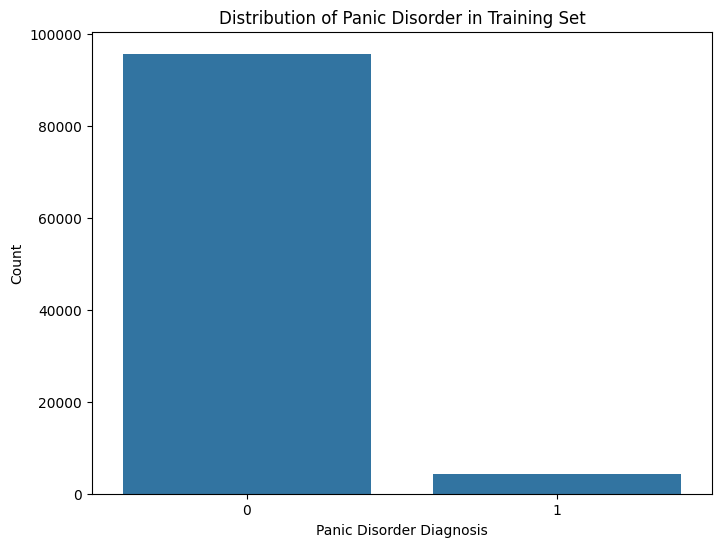

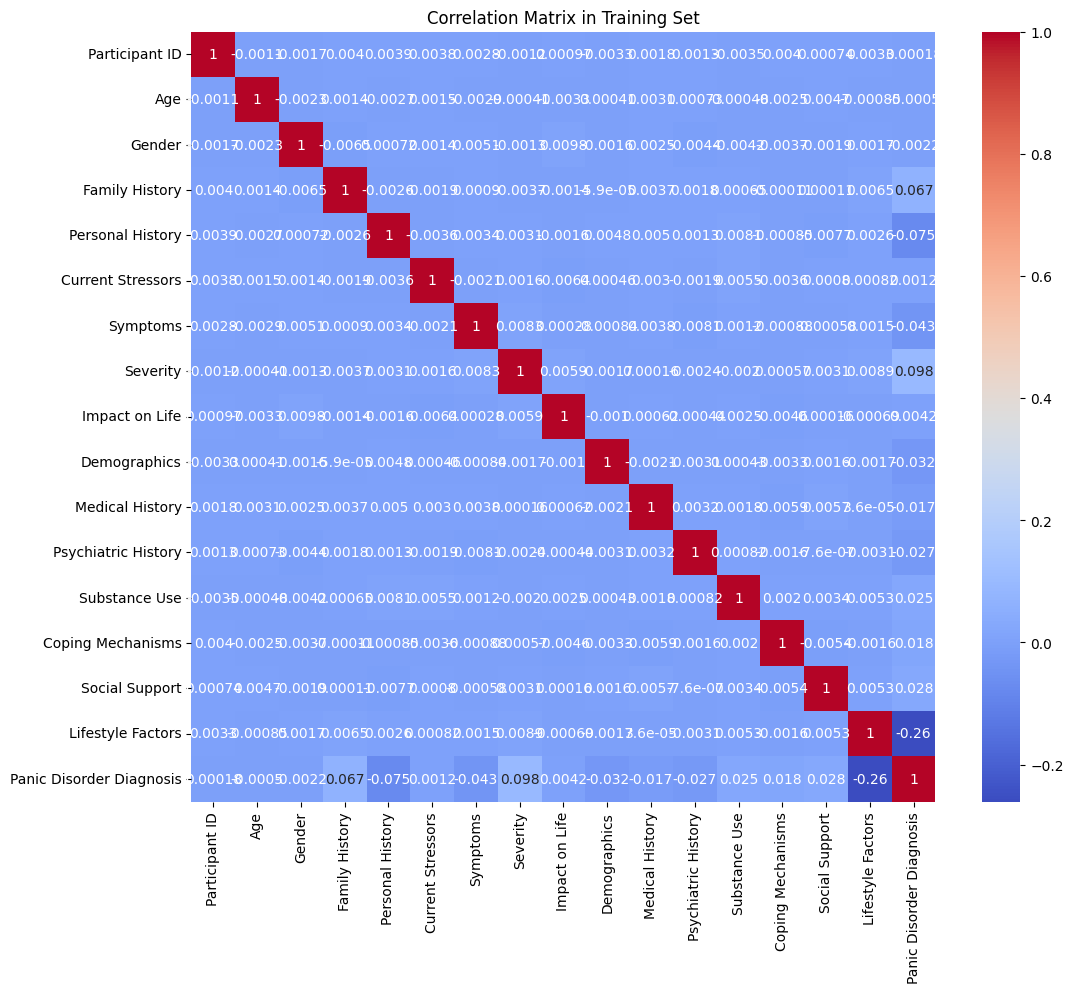

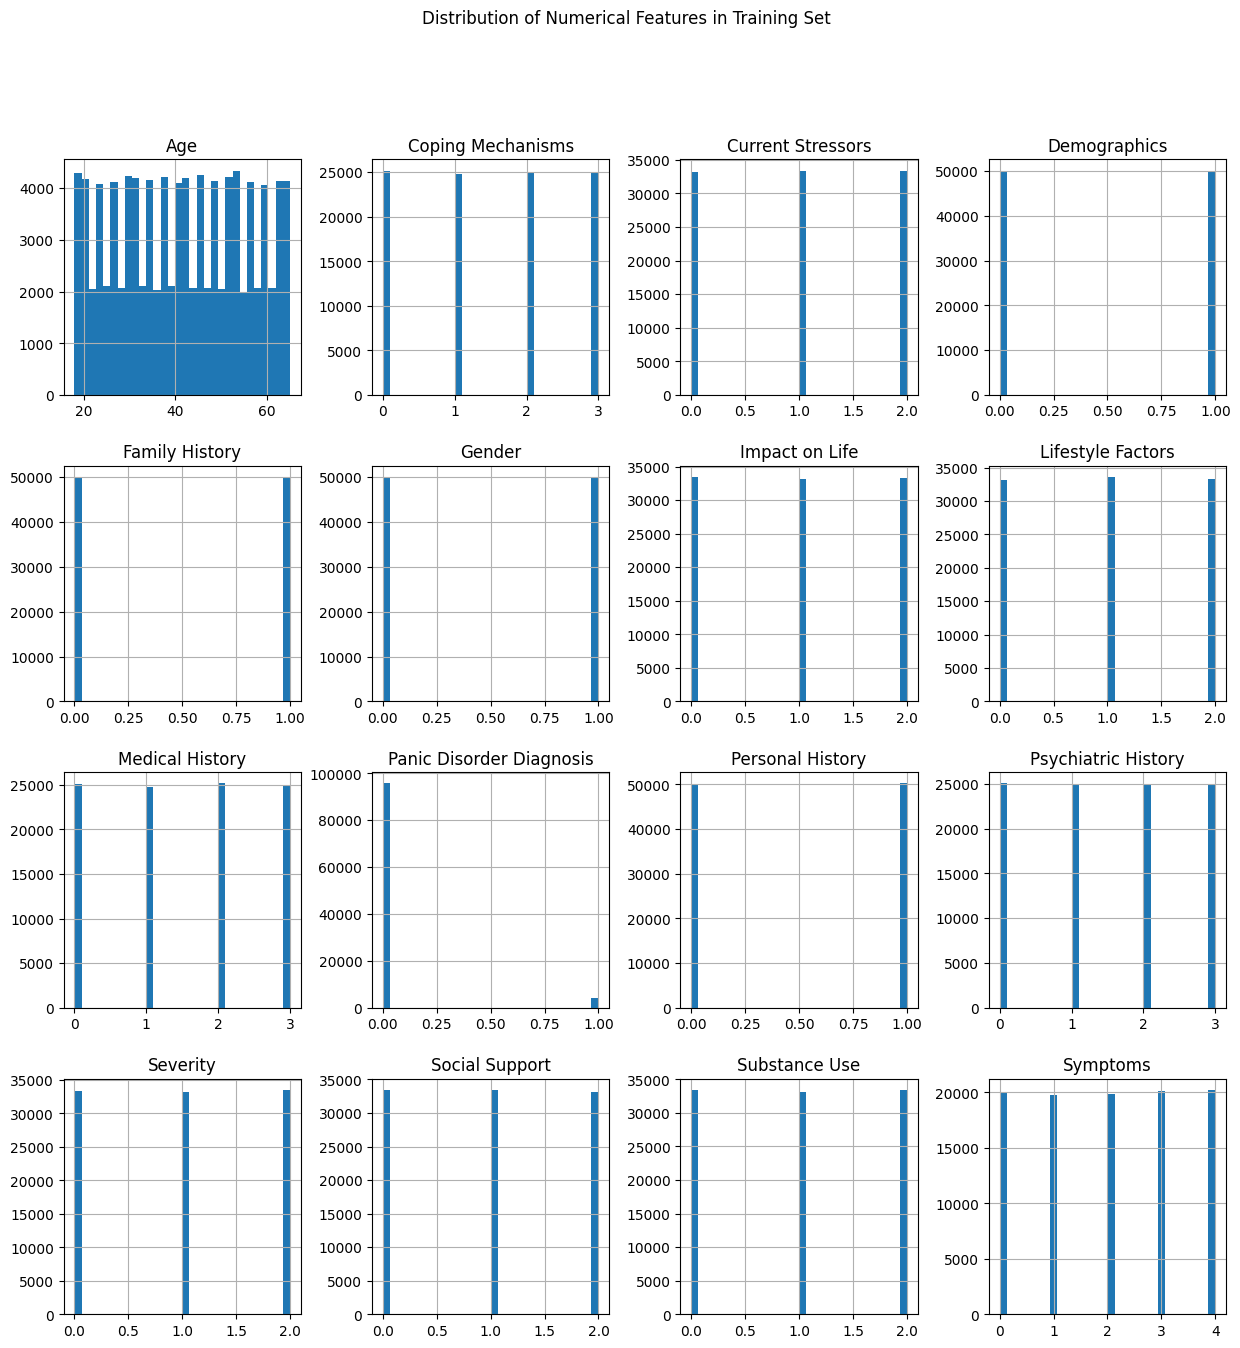

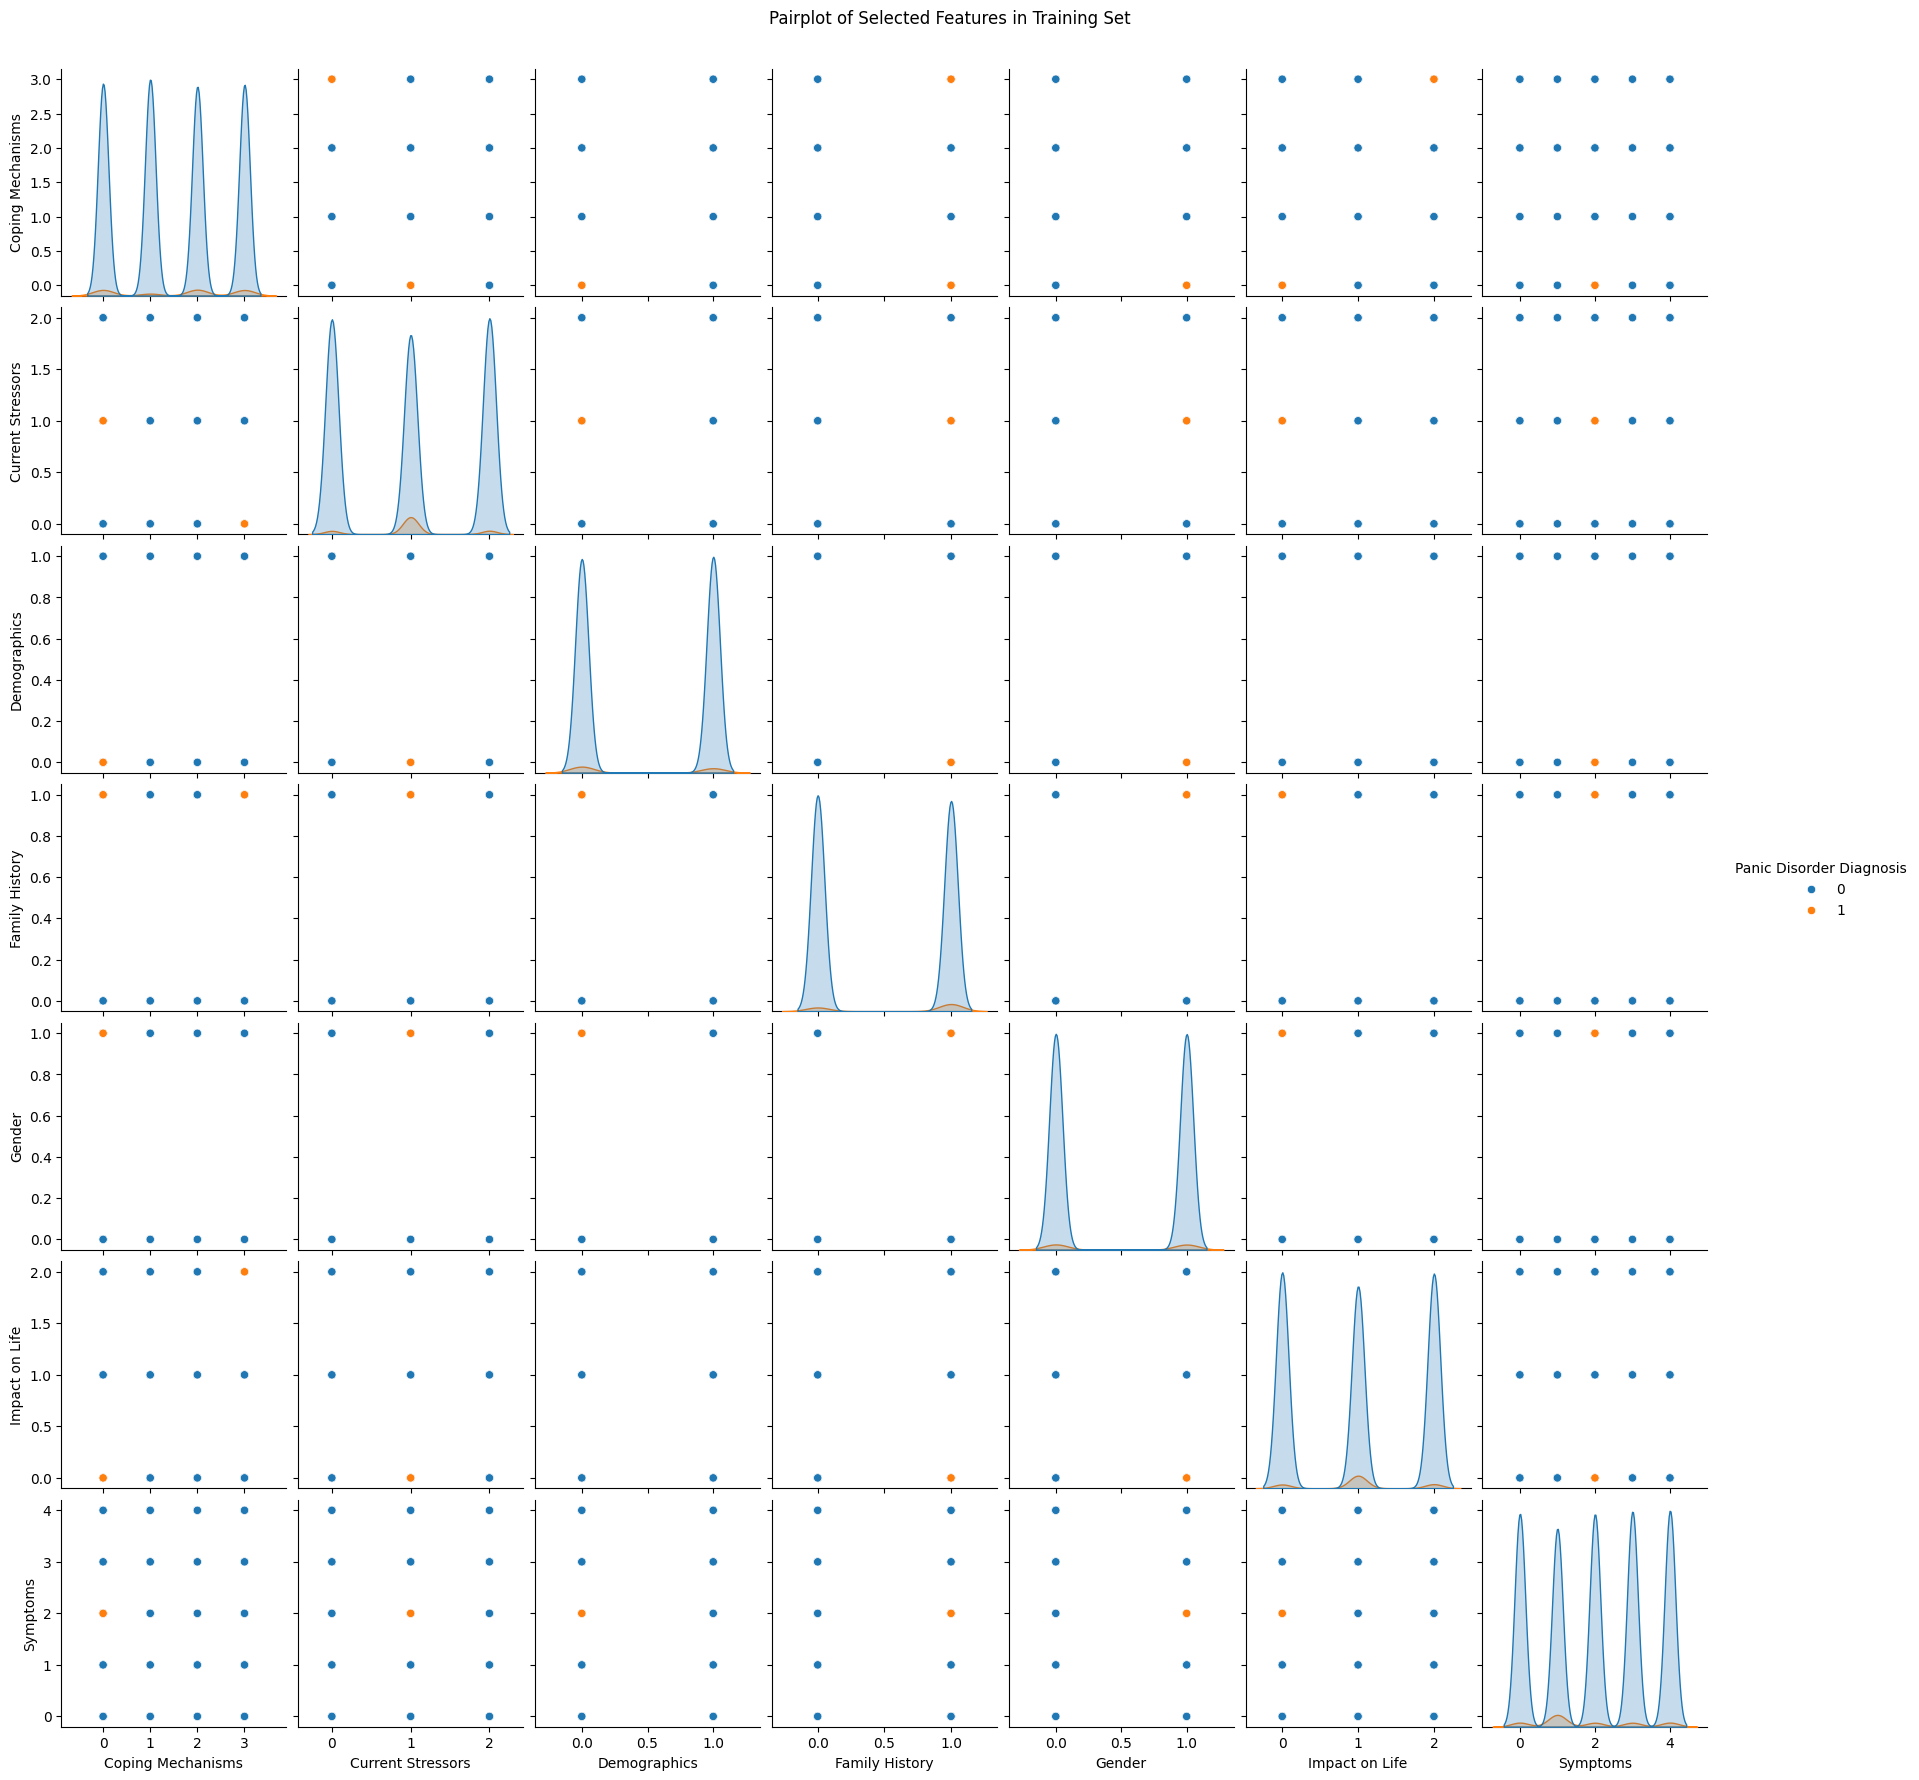

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Panic Disorder Diagnosis', data=train)
plt.title('Distribution of Panic Disorder in Training Set')
plt.xlabel('Panic Disorder Diagnosis')
plt.ylabel('Count')
plt.show()

# Visualize the correlation matrix in the training set
plt.figure(figsize=(12, 10))
correlation_matrix = train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix in Training Set')
plt.show()

# Visualize the distribution of numerical features in the training set
numerical_features = train.select_dtypes(include=['int64', 'float64']).columns.difference(['Participant ID'])
train[numerical_features].hist(bins=30, figsize=(15, 15))
plt.suptitle('Distribution of Numerical Features in Training Set')
plt.show()

# Visualize relationships between features in the training set using pairplot
# Using the selected features for the pairplot
selected_features = ['Coping Mechanisms', 'Current Stressors', 'Demographics', 'Family History',
                     'Gender', 'Impact on Life', 'Symptoms']
sns.pairplot(train[selected_features + ['Panic Disorder Diagnosis']], hue='Panic Disorder Diagnosis')
plt.suptitle('Pairplot of Selected Features in Training Set', y=1.02)
plt.show()

### Univariate Analysis

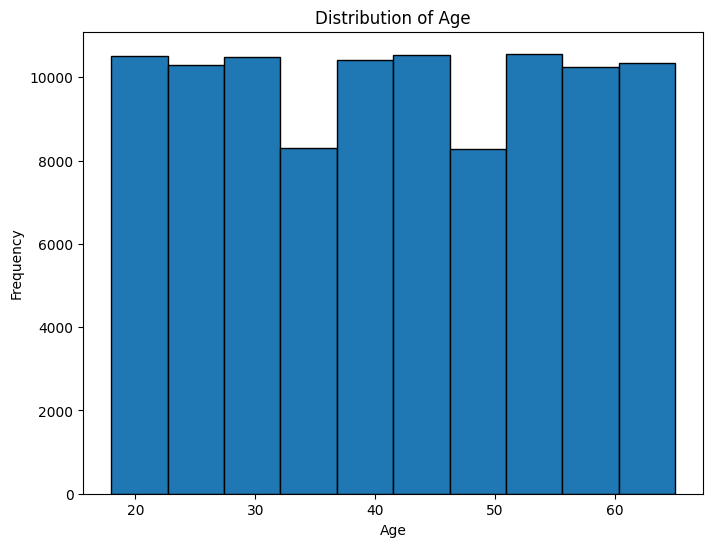

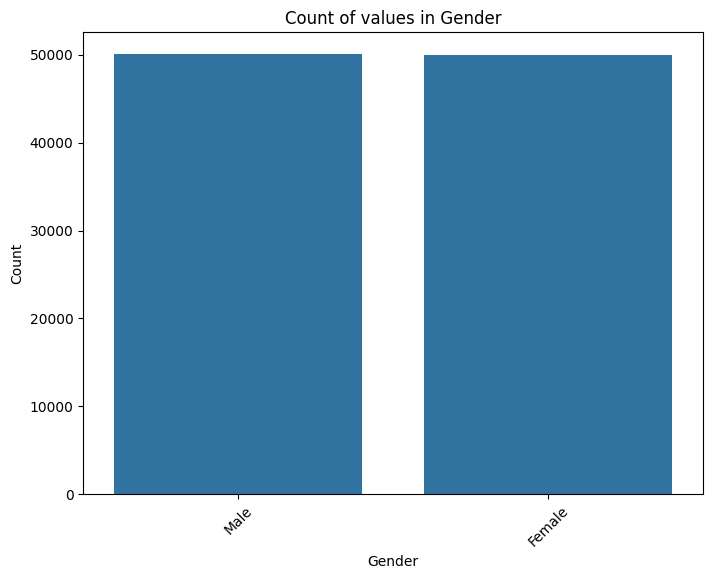

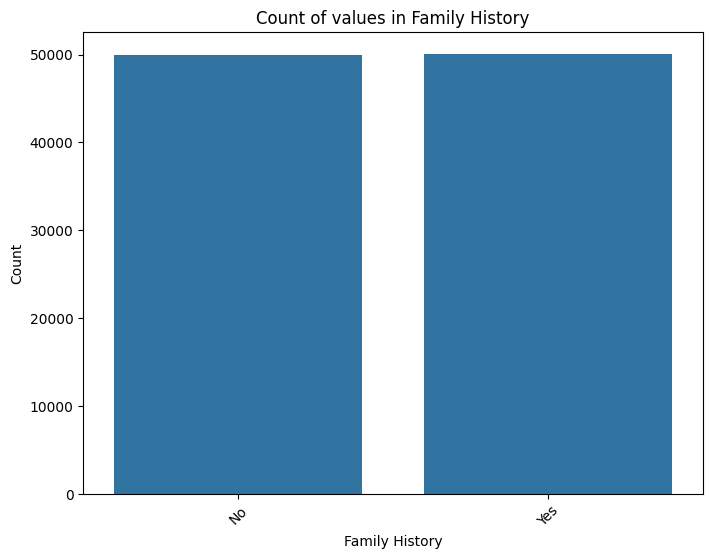

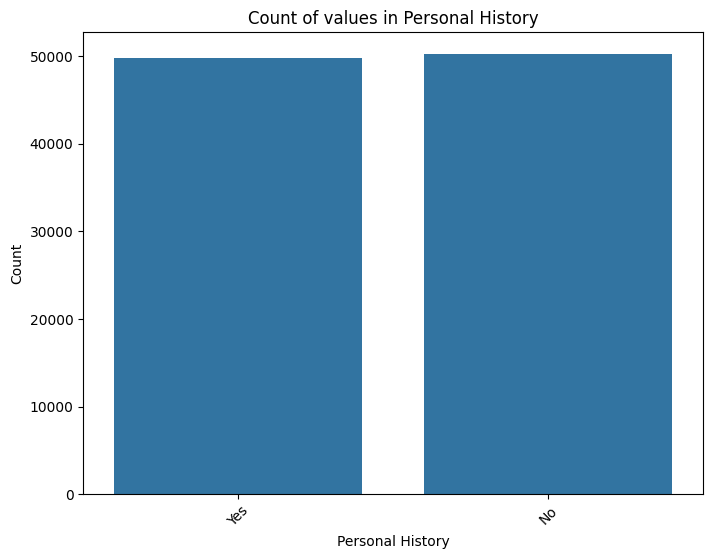

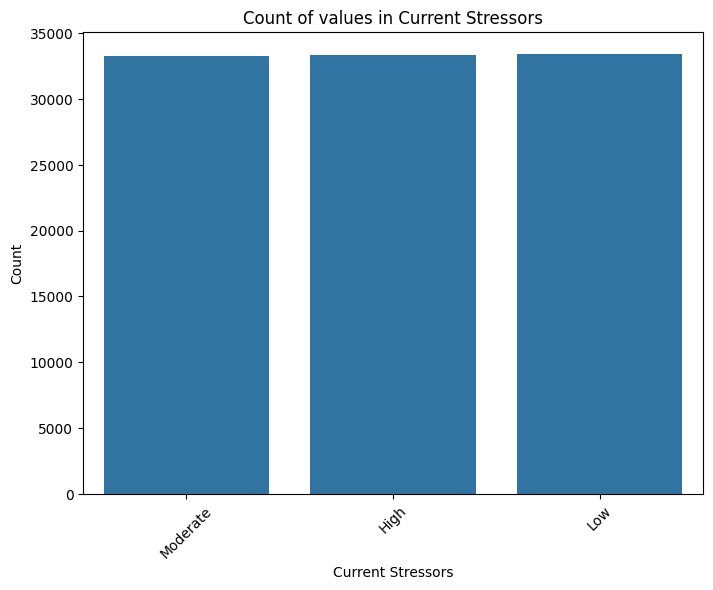

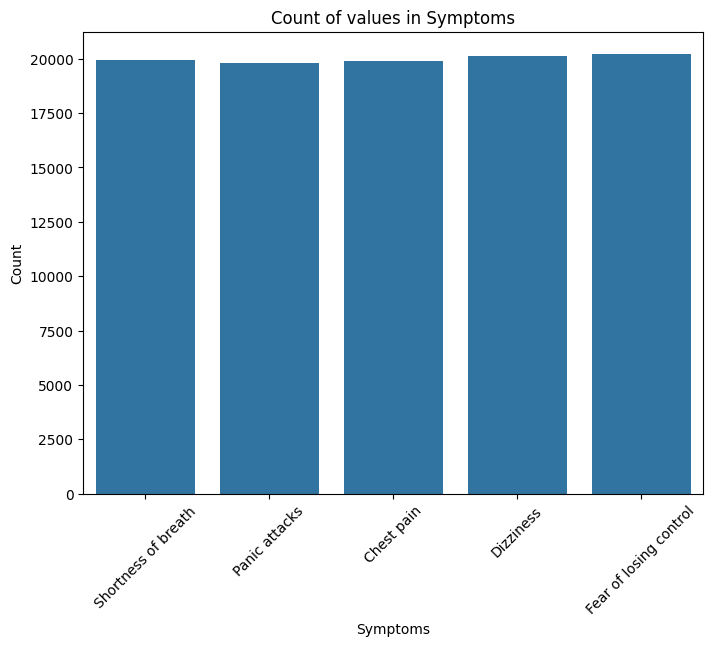

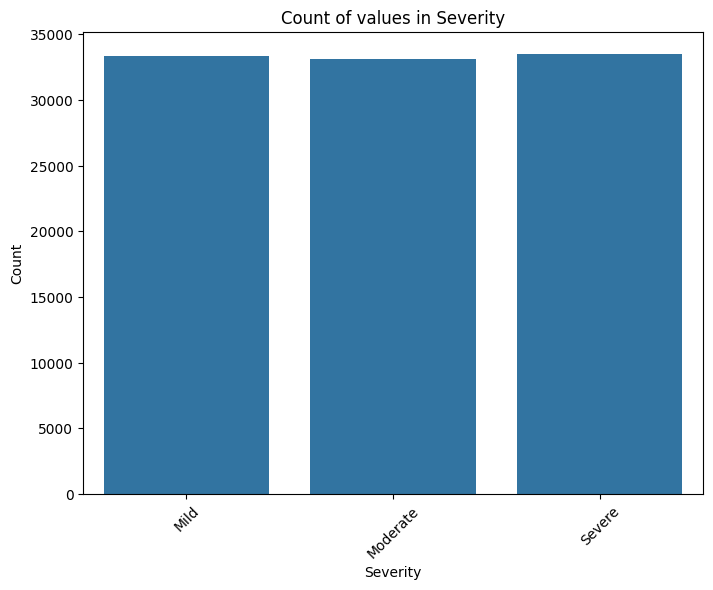

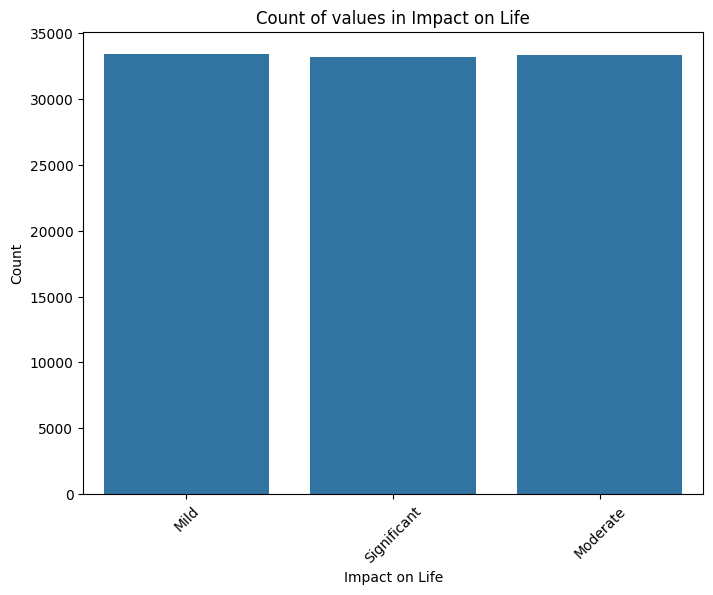

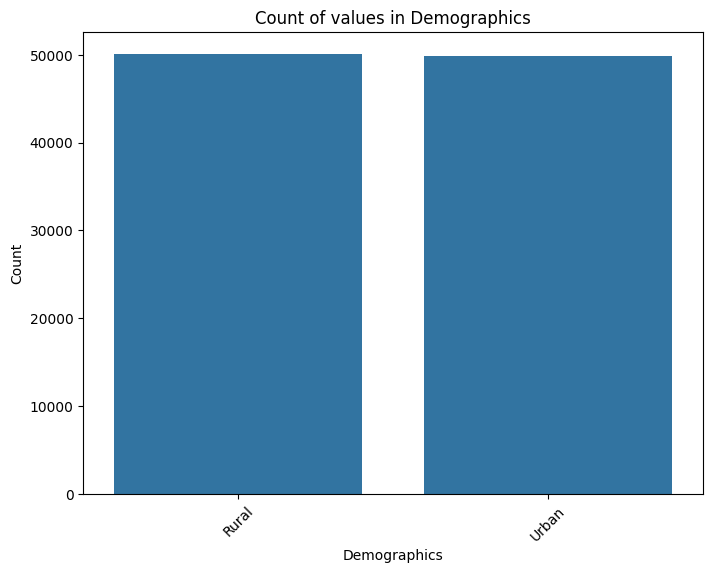

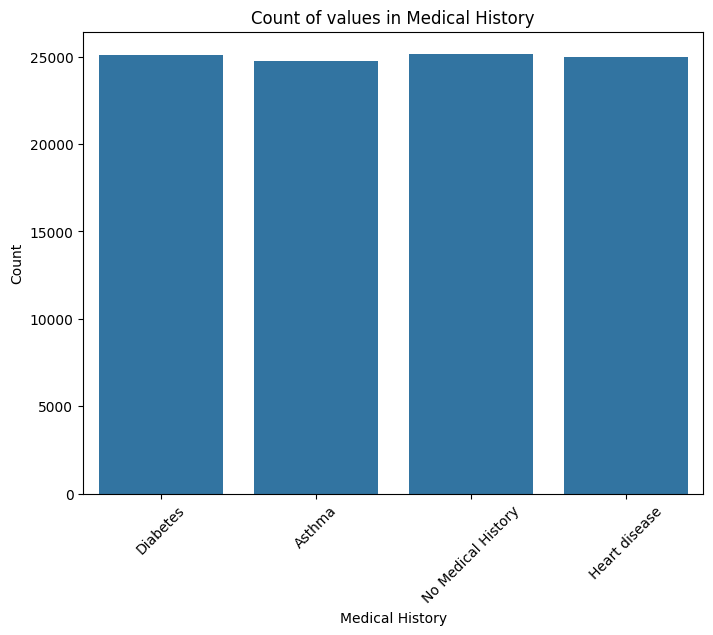

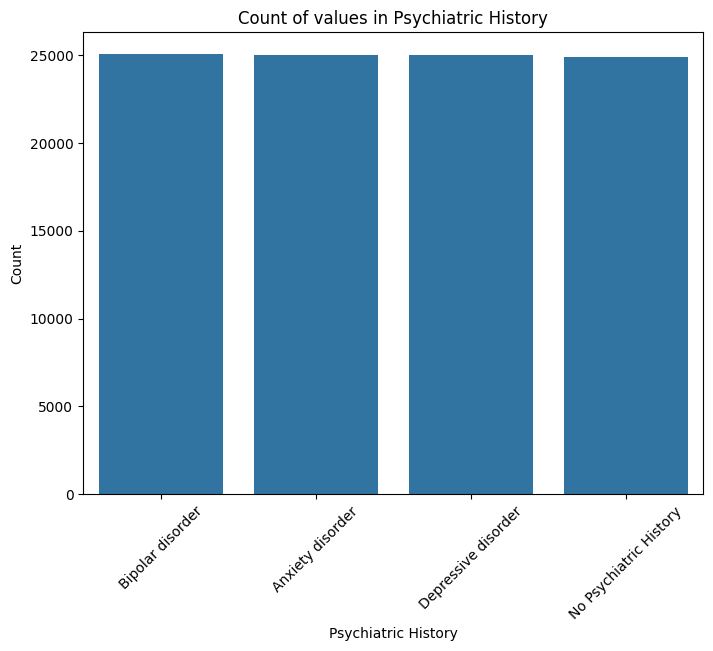

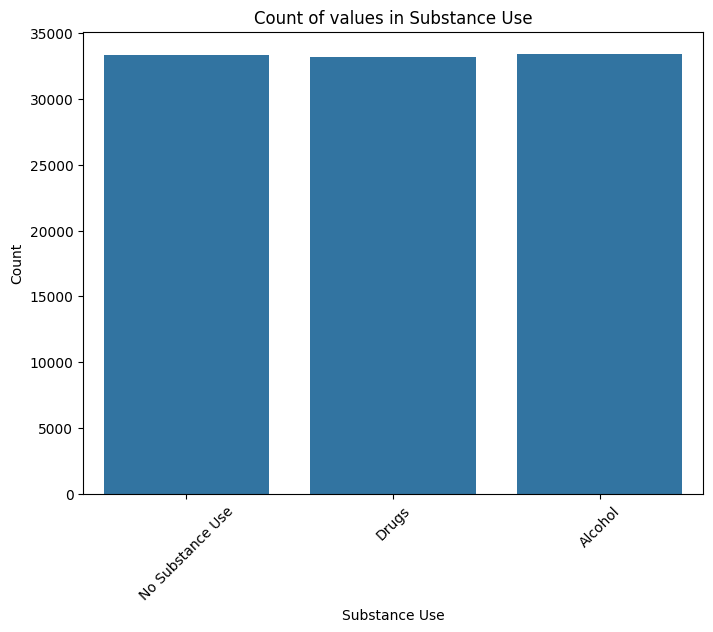

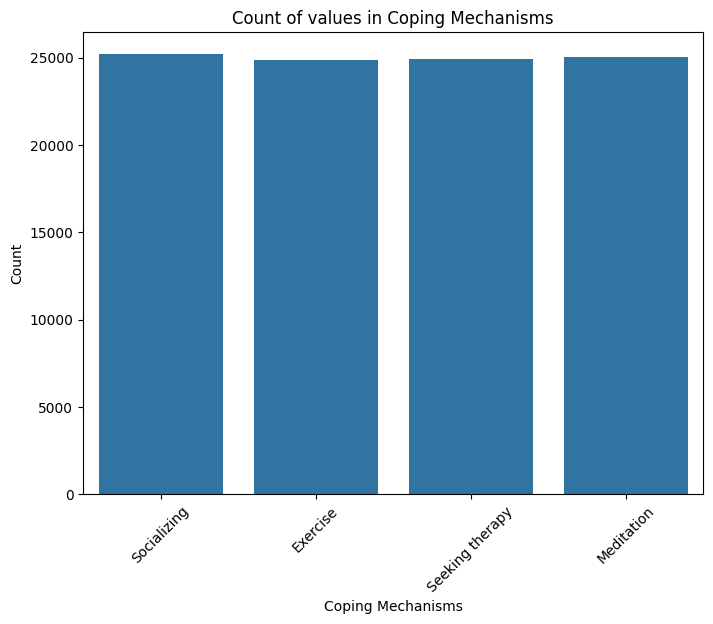

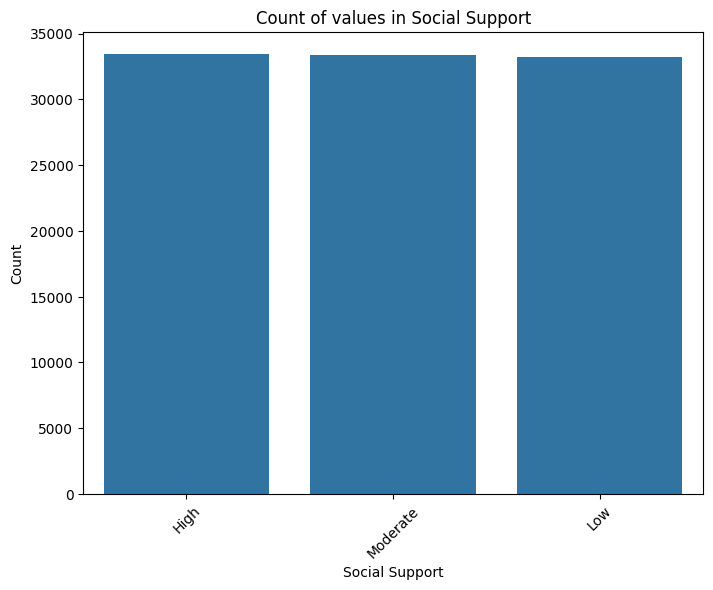

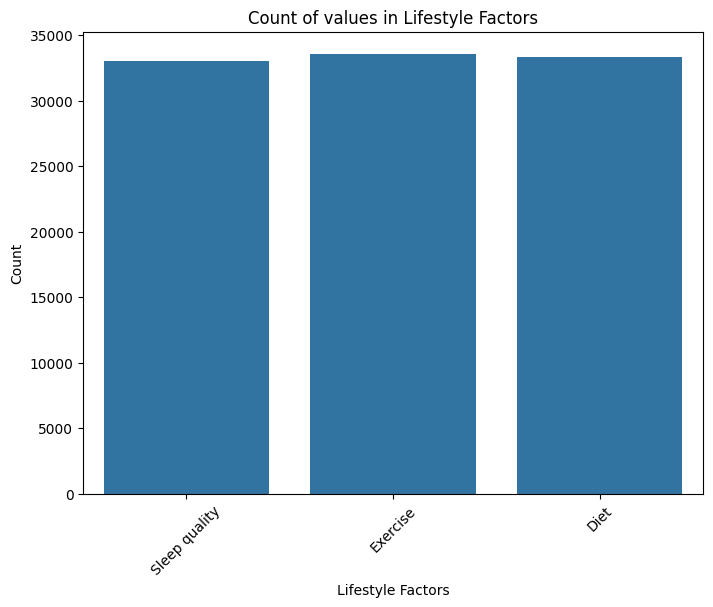

In [ ]:
numerical_features = ['Age']  # Add more numerical features if needed
cat_cols = ['Gender', 'Family History', 'Personal History', 'Current Stressors',
            'Symptoms', 'Severity', 'Impact on Life', 'Demographics',
            'Medical History', 'Psychiatric History', 'Substance Use',
            'Coping Mechanisms', 'Social Support', 'Lifestyle Factors']  # Define your categorical columns

# Univariate analysis for numerical features
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.hist(train[feature], bins=10, edgecolor="black")
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

# Univariate analysis for categorical features
for feature in cat_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=train)
    plt.title(f"Count of values in {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

### Bivariate Analysis

<Figure size 800x600 with 0 Axes>

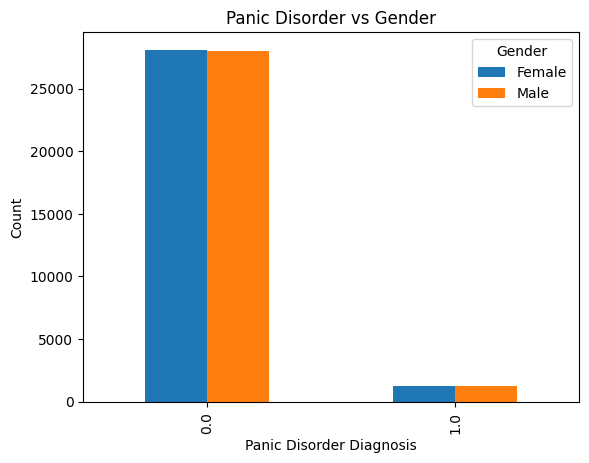

<Figure size 800x600 with 0 Axes>

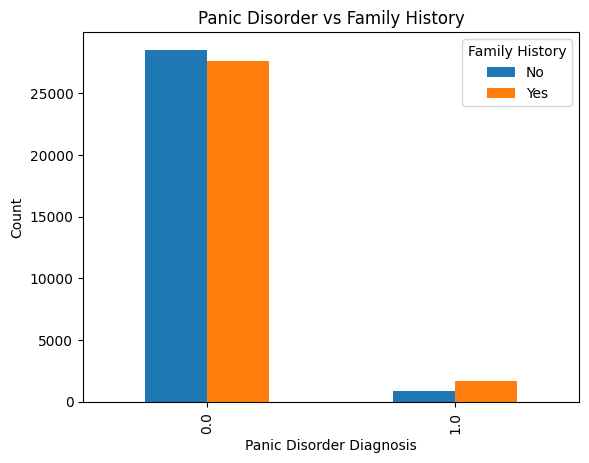

<Figure size 800x600 with 0 Axes>

KeyboardInterrupt: 

In [ ]:
# Analyze the relationship between Panic Disorder and Gender
plt.figure(figsize=(8, 6))
pd.crosstab(train['Panic Disorder Diagnosis'], train['Gender']).plot(kind='bar')
plt.title('Panic Disorder vs Gender')
plt.xlabel('Panic Disorder Diagnosis')
plt.ylabel('Count')
plt.show()

# Analyze the relationship between Panic Disorder and Family History
plt.figure(figsize=(8, 6))
pd.crosstab(train['Panic Disorder Diagnosis'], train['Family History']).plot(kind='bar')
plt.title('Panic Disorder vs Family History')
plt.xlabel('Panic Disorder Diagnosis')
plt.ylabel('Count')
plt.show()

# Analyze the relationship between Panic Disorder and Coping Mechanisms
plt.figure(figsize=(8, 6))
pd.crosstab(train['Panic Disorder Diagnosis'], train['Coping Mechanisms']).plot(kind='bar')
plt.title('Panic Disorder vs Coping Mechanisms')
plt.xlabel('Panic Disorder Diagnosis')
plt.ylabel('Count')
plt.show()

# Analyze the relationship between Panic Disorder and Current Stressors
plt.figure(figsize=(8, 6))
pd.crosstab(train['Panic Disorder Diagnosis'], train['Current Stressors']).plot(kind='bar')
plt.title('Panic Disorder vs Current Stressors')
plt.xlabel('Panic Disorder Diagnosis')
plt.ylabel('Count')
plt.show()

# Analyze the relationship between Panic Disorder and Impact on Life
plt.figure(figsize=(8, 6))
pd.crosstab(train['Panic Disorder Diagnosis'], train['Impact on Life']).plot(kind='bar')
plt.title('Panic Disorder vs Impact on Life')
plt.xlabel('Panic Disorder Diagnosis')
plt.ylabel('Count')
plt.show()

# Label encoding for categorical features

In [14]:
print(train.head())

   Participant ID  Age  Gender Family History Personal History  \
0               1   38    Male             No              Yes   
1               2   51    Male             No               No   
2               3   32  Female            Yes               No   
3               4   64  Female             No               No   
4               5   31    Male            Yes               No   

  Current Stressors             Symptoms  Severity Impact on Life  \
0          Moderate  Shortness of breath      Mild           Mild   
1              High        Panic attacks      Mild           Mild   
2              High        Panic attacks      Mild    Significant   
3          Moderate           Chest pain  Moderate       Moderate   
4          Moderate        Panic attacks      Mild       Moderate   

  Demographics Medical History     Psychiatric History     Substance Use  \
0        Rural        Diabetes        Bipolar disorder  No Substance Use   
1        Urban          Asthma      

In [81]:
le = {}
for column in train.columns:
    if train[column].dtype=='object':
        le[column] = {}
        c = 0
        for i in train[column].unique():
            le[column][i] = c
            c += 1
        train[column] = train[column].map(le[column])
le = {}
for column in test.columns:
  if test[column].dtype == object:
    le[column] = {}
    c = 0
    for i in test[column].unique():
      le[column][i] = c
      c += 1
    test[column] = test[column].map(le[column])

In [16]:
print(train.head())

   Participant ID  Age  Gender  Family History  Personal History  \
0               1   38       0               0                 0   
1               2   51       0               0                 1   
2               3   32       1               1                 1   
3               4   64       1               0                 1   
4               5   31       0               1                 1   

   Current Stressors  Symptoms  Severity  Impact on Life  Demographics  \
0                  0         0         0               0             0   
1                  1         1         0               0             1   
2                  1         1         0               1             1   
3                  0         2         1               2             0   
4                  0         1         0               2             0   

   Medical History  Psychiatric History  Substance Use  Coping Mechanisms  \
0                0                    0              0               

In [17]:
print(test.head())

   Participant ID  Age  Gender  Family History  Personal History  \
0               1   41       0               0                 0   
1               2   20       1               0                 0   
2               3   32       0               0                 1   
3               4   41       1               0                 1   
4               5   36       1               0                 0   

   Current Stressors  Symptoms  Severity  Impact on Life  Demographics  \
0                  0         0         0               0             0   
1                  1         0         0               1             0   
2                  0         1         1               0             1   
3                  2         0         2               1             0   
4                  0         2         1               1             1   

   Medical History  Psychiatric History  Substance Use  Coping Mechanisms  \
0                0                    0              0               

# Define features and labels

In [18]:
x_train=train.iloc[:,1:-1] #Dependent variables of the training dataset
y_train=train.iloc[:,-1] #Independent variables of the training dataset
x_test=test.iloc[:,1:-1] #Dependent variables of the testing dataset
y_test=test.iloc[:,-1] #Independent variables of the testing dataset

In [19]:
print(x_train.shape, y_train.shape)

(100000, 15) (100000,)


In [20]:
print(x_train.head())

   Age  Gender  Family History  Personal History  Current Stressors  Symptoms  \
0   38       0               0                 0                  0         0   
1   51       0               0                 1                  1         1   
2   32       1               1                 1                  1         1   
3   64       1               0                 1                  0         2   
4   31       0               1                 1                  0         1   

   Severity  Impact on Life  Demographics  Medical History  \
0         0               0             0                0   
1         0               0             1                1   
2         0               1             1                0   
3         1               2             0                0   
4         0               2             0                1   

   Psychiatric History  Substance Use  Coping Mechanisms  Social Support  \
0                    0              0                  0        

In [21]:
print(y_train.head())

0    0
1    0
2    0
3    0
4    0
Name: Panic Disorder Diagnosis, dtype: int64


In [24]:
print(x_test.head())

   Age  Gender  Family History  Personal History  Current Stressors  Symptoms  \
0   41       0               0                 0                  0         0   
1   20       1               0                 0                  1         0   
2   32       0               0                 1                  0         1   
3   41       1               0                 1                  2         0   
4   36       1               0                 0                  0         2   

   Severity  Impact on Life  Demographics  Medical History  \
0         0               0             0                0   
1         0               1             0                1   
2         1               0             1                2   
3         2               1             0                2   
4         1               1             1                1   

   Psychiatric History  Substance Use  Coping Mechanisms  Social Support  \
0                    0              0                  0        

In [25]:
print(y_test.head())

0    0
1    0
2    0
3    0
4    0
Name: Panic Disorder Diagnosis, dtype: int64


# Undersampling

In [26]:
class_0_indices = x_train[y_train == 0].index #negative class
class_1_indices = x_train[y_train == 1].index #positive class

undersample_indices = np.random.choice(class_0_indices, size=class_1_indices.shape[0], replace=False)

x_train_undersampled = pd.concat([x_train.loc[undersample_indices], x_train.loc[class_1_indices]])
y_train_undersampled = pd.concat([y_train.loc[undersample_indices], y_train.loc[class_1_indices]])

# Print before and after balancing
print("Before balancing", Counter(y_train))
print("After balancing", Counter(y_train_undersampled))


Before balancing Counter({0: 95715, 1: 4285})
After balancing Counter({0: 4285, 1: 4285})


In [27]:
# Display shapes of datasets
print(x_train.shape, y_train.shape)
print(x_train_undersampled.shape, y_train_undersampled.shape)


(100000, 15) (100000,)
(8570, 15) (8570,)


In [28]:
# Display first few rows of balanced data
print(x_train_undersampled.head())
print(y_train_undersampled.head())

       Age  Gender  Family History  Personal History  Current Stressors  \
47111   20       1               1                 1                  2   
34669   22       1               1                 0                  0   
15844   40       1               1                 0                  2   
82491   20       0               1                 0                  0   
14023   49       0               0                 1                  2   

       Symptoms  Severity  Impact on Life  Demographics  Medical History  \
47111         2         0               0             1                0   
34669         3         1               1             1                3   
15844         4         2               1             1                0   
82491         0         1               0             1                3   
14023         2         1               2             1                1   

       Psychiatric History  Substance Use  Coping Mechanisms  Social Support  \
47111       

In [29]:
print(x_test.shape)
print(y_test.shape)

(20000, 15)
(20000,)


# Feature Selection based on chi^2 test

In [30]:
# Perform Chi-Square test on undersampled data
f_p_values = chi2(x_train_undersampled, y_train_undersampled)
p_values = pd.Series(f_p_values[1], index=x_train_undersampled.columns)
p_values.sort_values(ascending=True, inplace=True)
print(p_values)

# Manually selected features based on the analysis
selected_features = ['Psychiatric History','Lifestyle Factors','Social Support','Substance Use','Personal History','Medical History','Severity','Coping Mechanisms', 'Current Stressors', 'Demographics', 'Family History', 'Gender', 'Impact on Life', 'Symptoms']

# Create a DataFrame with selected features
x_train_selected = x_train_undersampled[selected_features]
y_train_selected = y_train_undersampled
x_test_selected = x_test[selected_features]
y_test_selected = y_test


# Print the selected features and their corresponding p-values
print("Selected Features and their p-values:")
print(p_values[selected_features])

Lifestyle Factors      0.000000e+00
Severity               1.208389e-68
Personal History       2.747857e-39
Symptoms               8.448454e-21
Family History         3.331442e-19
Psychiatric History    2.984382e-08
Demographics           6.128044e-07
Substance Use          1.625186e-05
Social Support         2.826287e-05
Coping Mechanisms      1.252619e-03
Medical History        1.406222e-03
Age                    3.119112e-01
Gender                 3.216243e-01
Impact on Life         6.988997e-01
Current Stressors      8.129882e-01
dtype: float64
Selected Features and their p-values:
Psychiatric History    2.984382e-08
Lifestyle Factors      0.000000e+00
Social Support         2.826287e-05
Substance Use          1.625186e-05
Personal History       2.747857e-39
Medical History        1.406222e-03
Severity               1.208389e-68
Coping Mechanisms      1.252619e-03
Current Stressors      8.129882e-01
Demographics           6.128044e-07
Family History         3.331442e-19
Gender     

In [31]:
print(x_train_selected.shape)
print(x_test_selected.shape)
print(y_train_selected.shape)
print(y_test_selected.shape)

(8570, 14)
(20000, 14)
(8570,)
(20000,)


In [32]:
# Display the selected features' DataFrame
print(x_train_selected.head())

       Psychiatric History  Lifestyle Factors  Social Support  Substance Use  \
47111                    3                  1               0              1   
34669                    2                  0               0              2   
15844                    0                  0               0              2   
82491                    3                  1               0              0   
14023                    3                  1               0              0   

       Personal History  Medical History  Severity  Coping Mechanisms  \
47111                 1                0         0                  3   
34669                 0                3         1                  2   
15844                 0                0         2                  3   
82491                 0                3         1                  3   
14023                 1                1         1                  3   

       Current Stressors  Demographics  Family History  Gender  \
47111         

In [33]:
print(x_test_selected.head())

   Psychiatric History  Lifestyle Factors  Social Support  Substance Use  \
0                    0                  0               0              0   
1                    1                  1               1              1   
2                    0                  0               2              1   
3                    1                  2               1              2   
4                    2                  0               0              2   

   Personal History  Medical History  Severity  Coping Mechanisms  \
0                 0                0         0                  0   
1                 0                1         0                  1   
2                 1                2         1                  2   
3                 1                2         2                  1   
4                 0                1         1                  0   

   Current Stressors  Demographics  Family History  Gender  Impact on Life  \
0                  0             0               0

In [34]:
print(x_train_selected.shape)
print(x_test_selected.shape)

(8570, 14)
(20000, 14)


# Training and Testing The Model In Multiple Algorithms

In [35]:
# Assuming x_train, x_test, y_train, y_test are defined and preprocessed

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier()
}


# Testing and Comparing Model With Multiple Evaluation Metrics

Logistic Regression - Accuracy: 0.7046


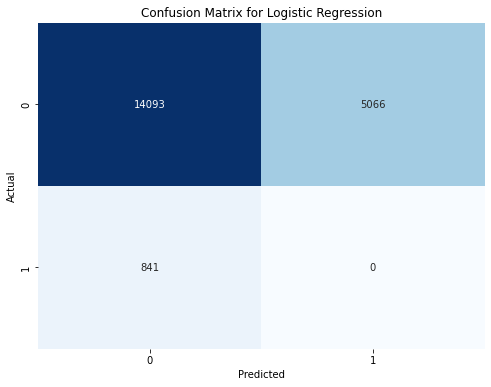

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.94      0.74      0.83     19159
           1       0.00      0.00      0.00       841

    accuracy                           0.70     20000
   macro avg       0.47      0.37      0.41     20000
weighted avg       0.90      0.70      0.79     20000

Decision Tree - Accuracy: 0.9050


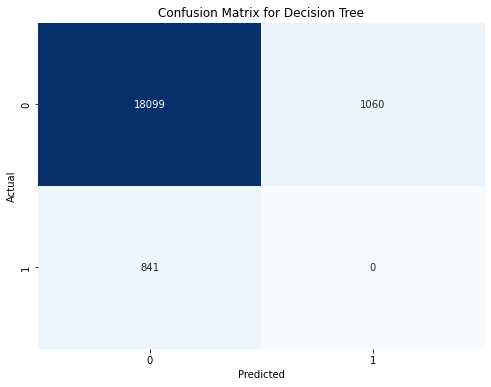

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     19159
           1       0.00      0.00      0.00       841

    accuracy                           0.90     20000
   macro avg       0.48      0.47      0.48     20000
weighted avg       0.92      0.90      0.91     20000

Extra Trees - Accuracy: 0.8831


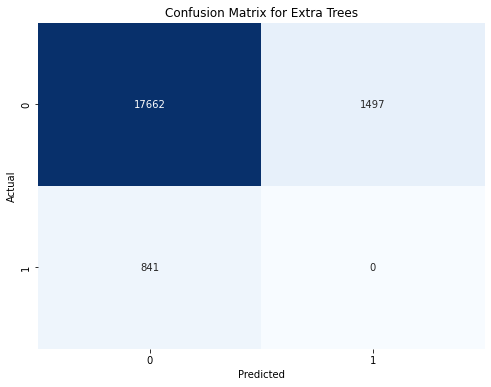

Classification Report for Extra Trees:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94     19159
           1       0.00      0.00      0.00       841

    accuracy                           0.88     20000
   macro avg       0.48      0.46      0.47     20000
weighted avg       0.91      0.88      0.90     20000

Random Forest - Accuracy: 0.8861


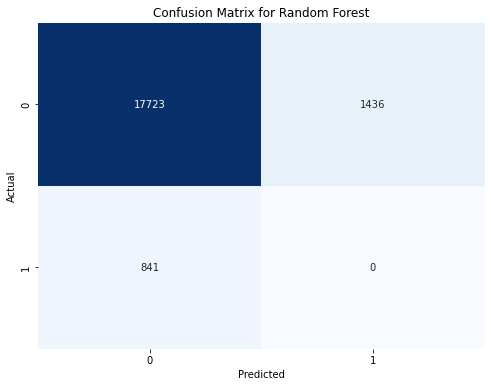

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     19159
           1       0.00      0.00      0.00       841

    accuracy                           0.89     20000
   macro avg       0.48      0.46      0.47     20000
weighted avg       0.91      0.89      0.90     20000

Gradient Boosting - Accuracy: 0.8926


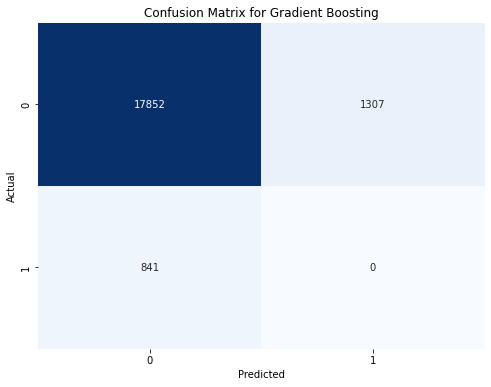

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94     19159
           1       0.00      0.00      0.00       841

    accuracy                           0.89     20000
   macro avg       0.48      0.47      0.47     20000
weighted avg       0.91      0.89      0.90     20000

SVM - Accuracy: 0.7994


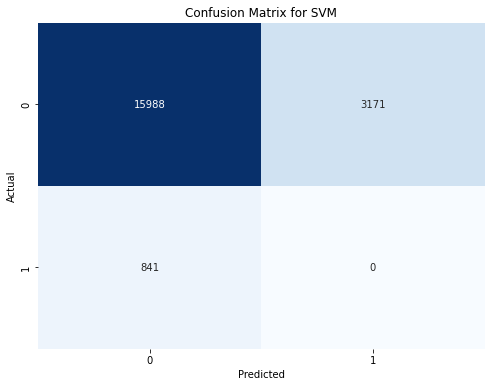

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.95      0.83      0.89     19159
           1       0.00      0.00      0.00       841

    accuracy                           0.80     20000
   macro avg       0.48      0.42      0.44     20000
weighted avg       0.91      0.80      0.85     20000

K-Nearest Neighbors - Accuracy: 0.6740


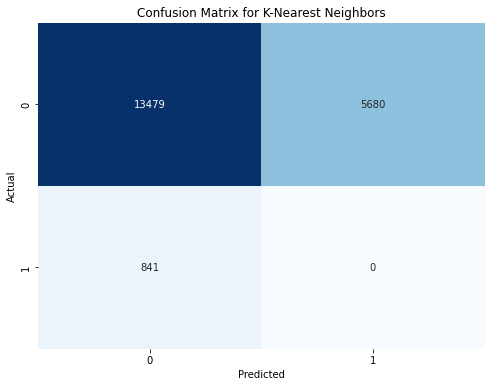

Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.94      0.70      0.81     19159
           1       0.00      0.00      0.00       841

    accuracy                           0.67     20000
   macro avg       0.47      0.35      0.40     20000
weighted avg       0.90      0.67      0.77     20000

XGBoost - Accuracy: 0.9135


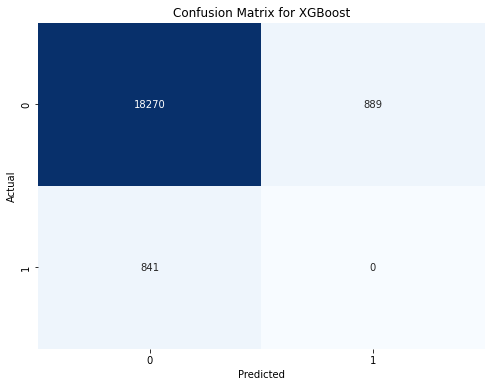

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95     19159
           1       0.00      0.00      0.00       841

    accuracy                           0.91     20000
   macro avg       0.48      0.48      0.48     20000
weighted avg       0.92      0.91      0.91     20000



In [36]:
# Train and evaluate each model
for model_name, model in models.items():
    model.fit(x_train_selected, y_train_selected)
    y_pred = model.predict(x_test_selected)

    # Calculate accuracy
    accuracy = accuracy_score(y_test_selected, y_pred)
    print(f"{model_name} - Accuracy: {accuracy:.4f}")

    # Display confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Display classification report
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test_selected, y_pred))


# Comparing Model Accuracy Before & After Applying Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Decision Tree
model_name = 'Decision Tree'
model = DecisionTreeClassifier()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(x_train_selected, y_train_selected)
tuned_model = grid_search.best_estimator_

# Train the best model
tuned_model.fit(x_train_selected, y_train_selected)
y_pred_tuned = tuned_model.predict(x_test_selected)

# Calculate accuracy
accuracy_after = accuracy_score(y_test_selected, y_pred_tuned)
print(f"{model_name} - Best Params: {grid_search.best_params_}")
print(f"{model_name} - Accuracy: {accuracy_after:.4f}")


Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Decision Tree - Best Params: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
Decision Tree - Accuracy: 0.9034


In [37]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Gradient Boosting
model_name = 'Gradient Boosting'
model = GradientBoostingClassifier()

# Train and evaluate before tuning
model.fit(x_train_selected, y_train_selected)
y_pred = model.predict(x_test_selected)
accuracy_before = accuracy_score(y_test_selected, y_pred)

# Print accuracy before tuning
print(f"{model_name} - Accuracy before tuning: {accuracy_before:.4f}")

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(x_train_selected, y_train_selected)
tuned_model_gradient = grid_search.best_estimator_

# Evaluate after tuning
y_pred_tuned = tuned_model_gradient.predict(x_test_selected)
accuracy_after = accuracy_score(y_test_selected, y_pred_tuned)

# Print accuracy after tuning
print(f"{model_name} - Accuracy after tuning: {accuracy_after:.4f}")


Gradient Boosting - Accuracy before tuning: 0.8926
Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Gradient Boosting - Accuracy after tuning: 0.9154


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# XGBoost
model_name = 'XGBoost'
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(x_train_selected, y_train_selected)
tuned_model = grid_search.best_estimator_

# Train the best model
tuned_model.fit(x_train_selected, y_train_selected)
y_pred_tuned = tuned_model.predict(x_test_selected)

# Calculate accuracy
accuracy_after = accuracy_score(y_test_selected, y_pred_tuned)
print(f"{model_name} - Best Params: {grid_search.best_params_}")
print(f"{model_name} - Accuracy: {accuracy_after:.4f}")


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
XGBoost - Best Params: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
XGBoost - Accuracy: 0.9151


In [38]:
import pickle

In [39]:
# Save the model
pickle.dump(tuned_model_gradient,open("gradient.pkl","wb"))

In [40]:
# Save the label encodings
pickle.dump(le,open("label_encoding.pkl","wb"))